In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from pathlib import Path
import os
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
import re
from textblob import TextBlob
import spacy
from spacy import displacy

/Users/veochae/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/veochae/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /Users/veochae/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [5]:
!pip install spacy --upgrade

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/77/ec/305ad732d9793652b528630499c37e0d1558d017aeab6572d61a30e99b96/spacy-3.6.1-cp310-cp310-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for thinc<8.2.0,>=8.1.8 from https://files.pythonhosted.org/packages/f6/d5/01ee4ea402f06d4cf155ba5a1ba57af3abd6d8fb925c72d776f80d1e91b7/thinc-8.1.12-cp310-cp310-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for srsly<3.0.0,>=2.4.3 from https://files.pythonhosted.org/packages/f5/f3/634a78961d1cfc0c605e27b6619d917ced39544c646b1537cb691967f8aa/srsly-2.4.7-cp310-cp310-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for catalogue<2.1.0,>=2.0.6 from https://files.pythonhosted.org/packages/45/8f/5b73efc14e0373d9bb0de6ce1ab04a8f77420dc473f1f3ef270caf085cff/catalogue-2.0.9-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 26.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
nlp = spacy.load("en_core_web_sm")

/Users/veochae/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (3.5.0) requires spaCy v3.5 and is incompatible with the current spaCy version (2.3.9). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


KeyError: "[E002] Can't find factory for 'tok2vec'. This usually happens when spaCy calls `nlp.create_pipe` with a component name that's not built in - for example, when constructing the pipeline from a model's meta.json. If you're using a custom component, you can write to `Language.factories['tok2vec']` or remove it from the model meta and add it via `nlp.add_pipe` instead."

In [4]:
print(Path.cwd())
os.chdir('../data/cleaned data')

c:\Users\Graduate\Desktop\Dreams\data visualization


In [5]:
df = pd.read_csv("complete.csv", index_col= 0)

In [6]:
tag_dict = {"word" :[], "tag":[]}
full = []

for i in df['complete']:
    sent = nlp(i)
    for j in sent:
        tag_dict['word'].append(j.text)
        tag_dict['tag'].append(j.tag_)

# #tag list can be found in : https://www.guru99.com/pos-tagging-chunking-nltk.html

In [7]:
tag_df  = pd.DataFrame(tag_dict)

In [8]:
tag_desc = pd.read_csv("../nltk_tag_description.csv", index_col= None).to_dict("list")

In [9]:
def barplot(x, z="", l = False):
    t = np.unique(x, return_counts = True)
    s = np.argsort(t[1])

    if l == True:
        x = t[0][s][-z:]
        y = t[1][s][-z:]
    else:   
        x = t[0][s]
        y = t[1][s]

    fig = plt.figure(figsize=(8,8)) #INITIALIZE FIGURE 
    ax = fig.add_subplot()

    ax.bar(x,y)

    ax.set_title(f"Barplot", fontsize = 20)
    ax.set_xlabel(f"", fontsize = 15)
    ax.set_ylabel("Count", fontsize = 15)
    plt.xticks(rotation=90)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


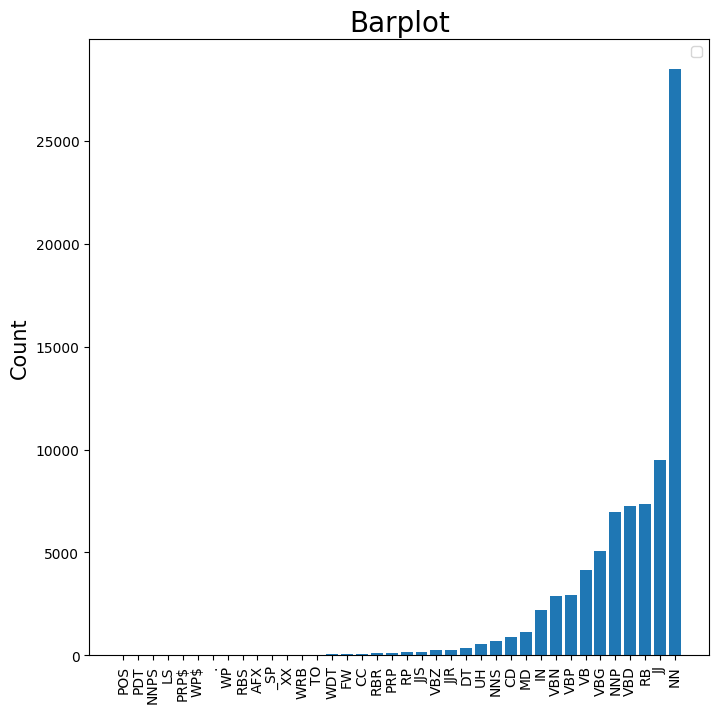

In [10]:
barplot(tag_df['tag'])

In [11]:
def wordcloud(x, lim):
    text = " ".join(x)
    cloud = WordCloud(collocations = False, max_words = lim).generate(text)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [12]:
tag_desc['$'] = ['Quant']

In [13]:
np.unique(tag_df['tag'])

array(['.', 'AFX', 'CC', 'CD', 'DT', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS',
       'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$',
       'RB', 'RBR', 'RBS', 'RP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN',
       'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', 'XX', '_SP'], dtype=object)

.


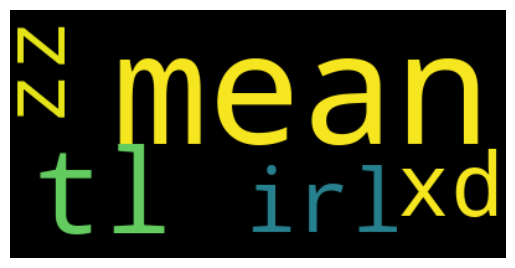

AFX


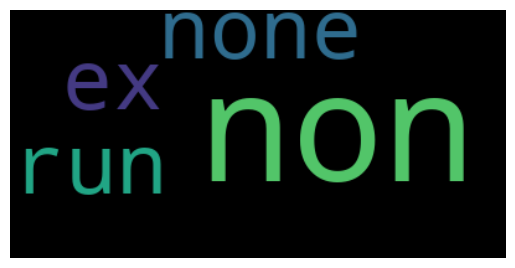

CC


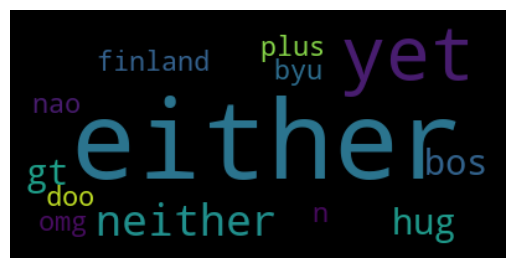

CD


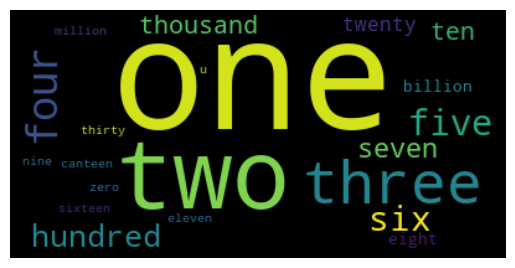

DT


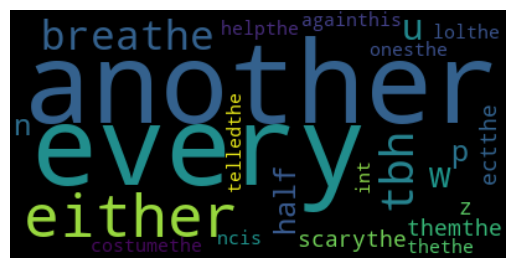

FW


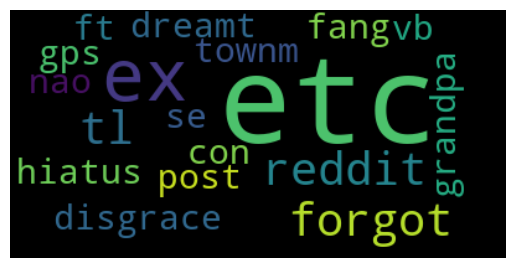

IN


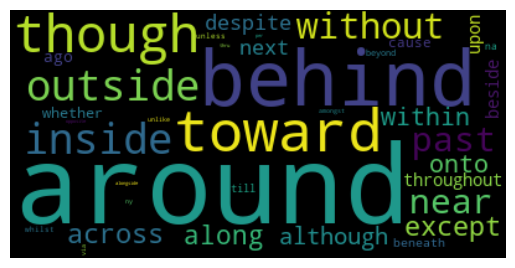

JJ


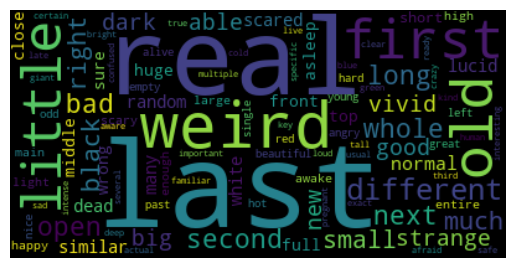

JJR


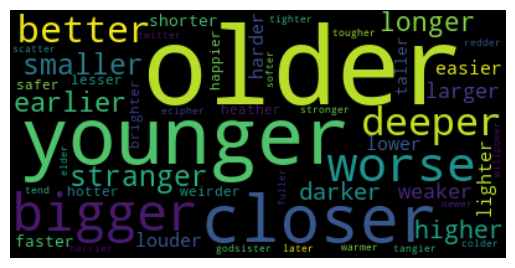

JJS


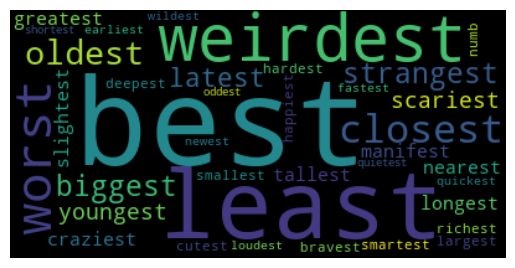

LS


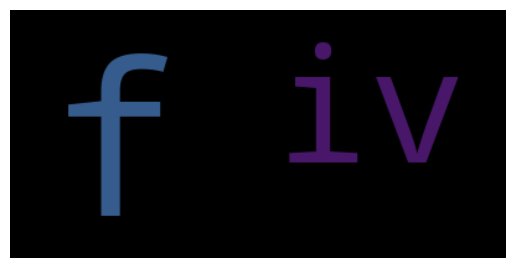

MD


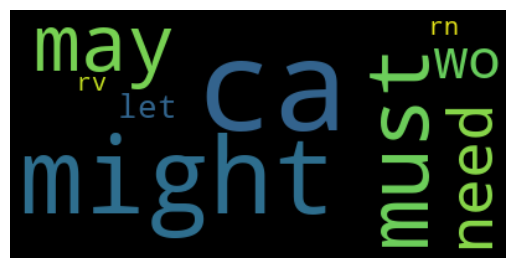

NN


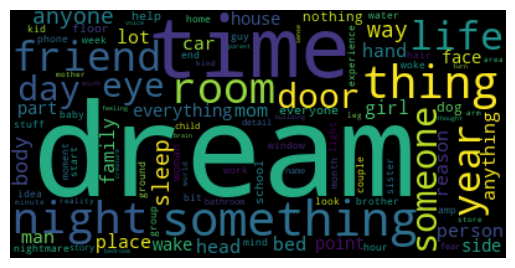

NNP


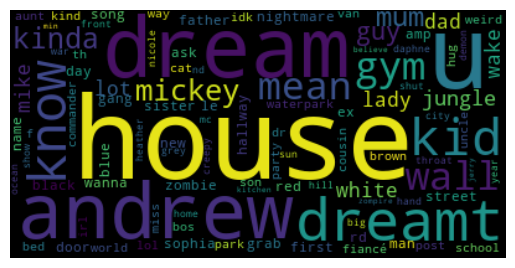

NNPS


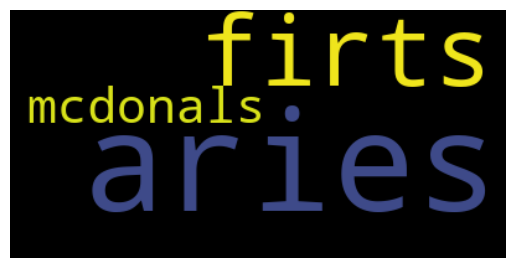

NNS


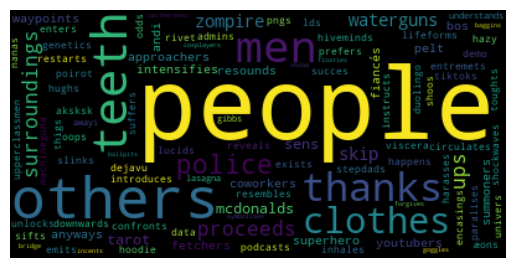

PDT


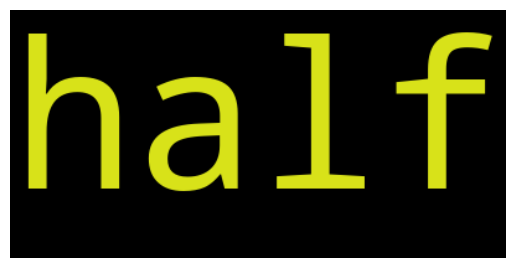

POS


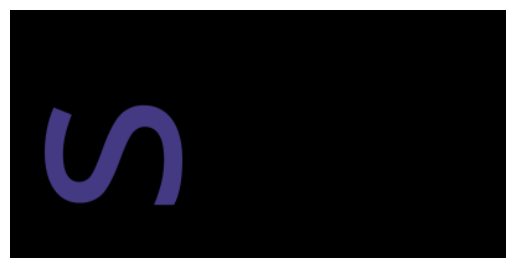

PRP


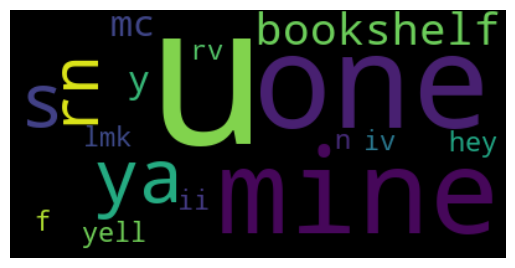

PRP$


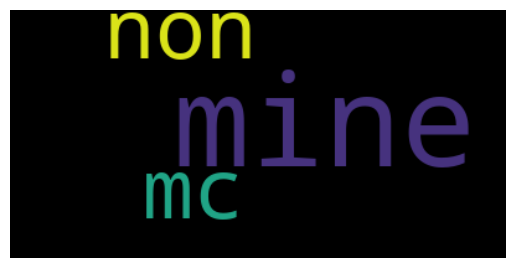

RB


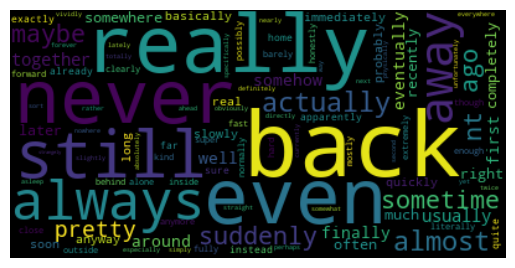

RBR


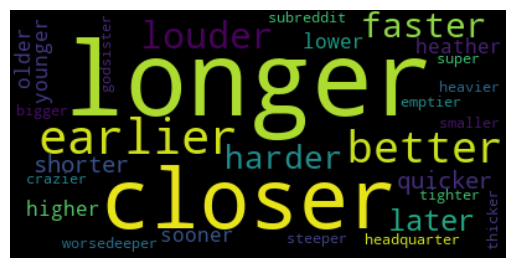

RBS


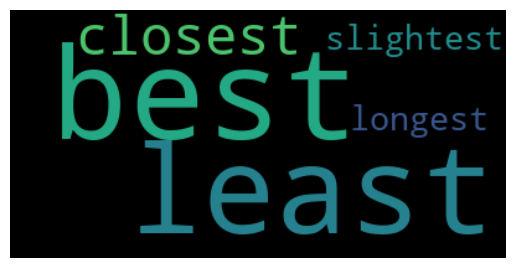

RP


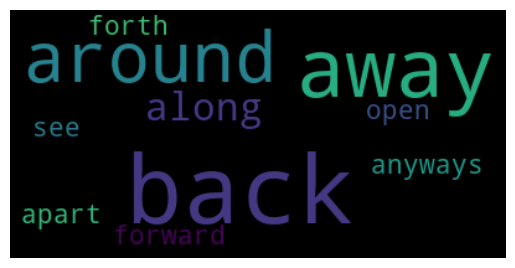

TO


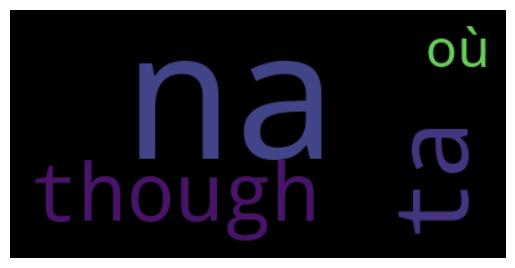

UH


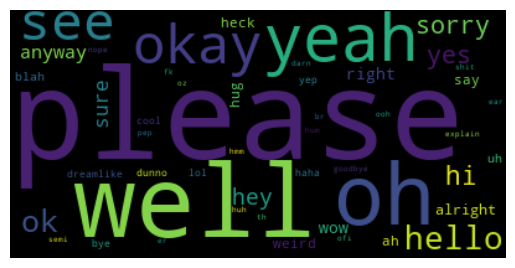

VB


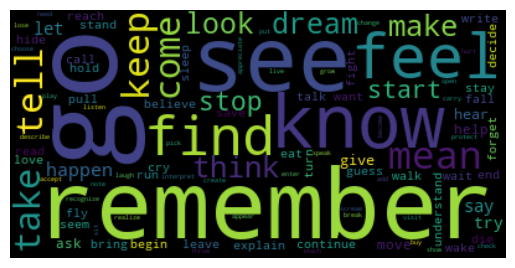

VBD


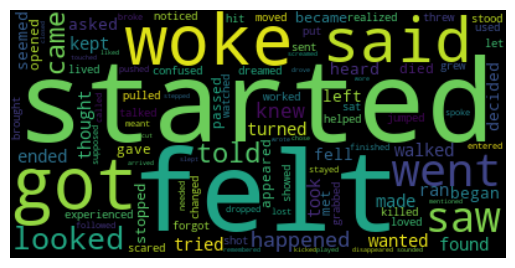

VBG


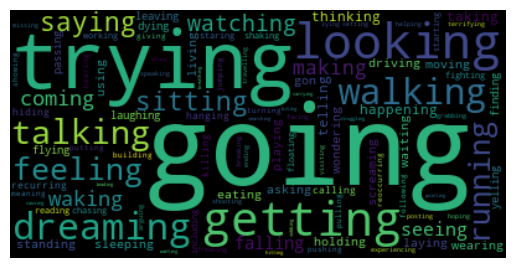

VBN


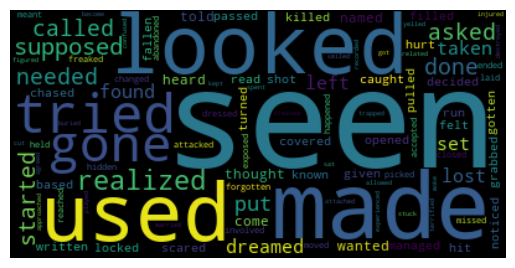

VBP


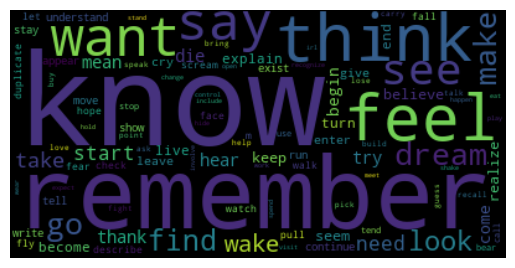

VBZ


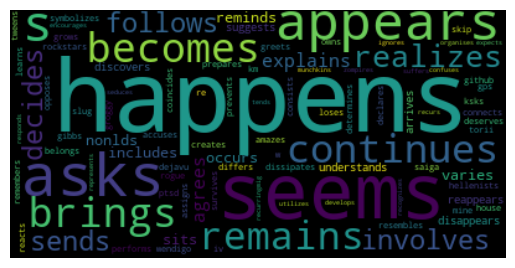

WDT


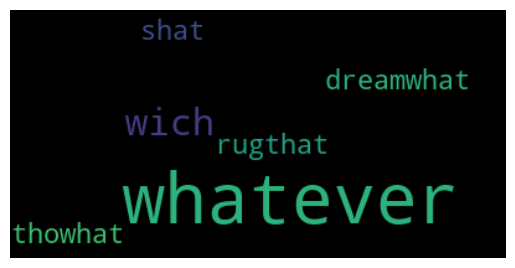

WP


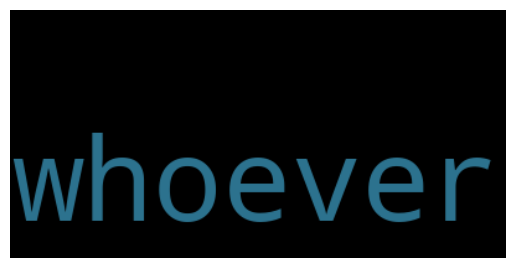

WP$


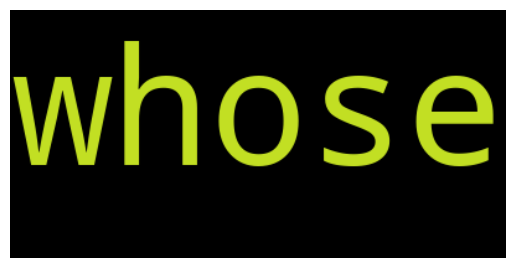

WRB


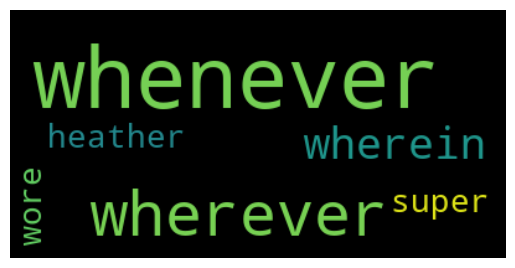

XX


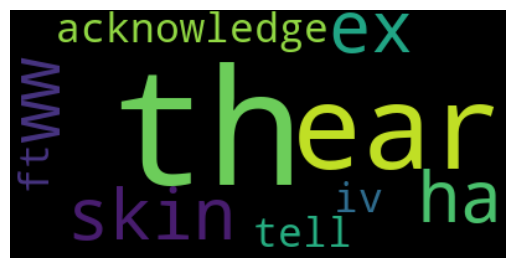

_SP
Word Cloud ValueError 



In [14]:
for i in np.unique(tag_df['tag']):
    temp = list(tag_df.loc[tag_df['tag'] == i , 'word'])
    print(i)
    #print(i, tag_desc[i])
    try:
        wordcloud(temp, lim = 100)
    except ValueError:
        print("Word Cloud ValueError \n")
        pass

In [15]:
df2 = pd.read_csv("../raw data/semi_raw.csv")

In [16]:
sentence = list(nlp(df2['text'][2]).sents)

In [19]:
displacy.render(sentence, style = "dep", jupyter=True, options = {'compact': True, 'color': '#008000'})